In [19]:
def _zebra_read_stripes(file_name):
    
    hold_dict = {x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]}
    source_dict = {5:{x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]},3:{x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]}}
    
    check_c = [f"chr{n}" for n in range(1,23)] + ["chrX"]
    var5 = []
    var3 = []
    incre=-1
#     with open("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/zebra_merge/GM12878.bedpe", "r") as f:
    with open(file_name, "r") as f:
        f.readline()
        for line in f:
            chromo,c1,c2,_,c4,c5=line.split()
            if chromo != check_c[0]:
                check_c.pop(0)
            incre+=1
            if int(c2)-int(c1)<int(c5)-int(c4):
                source_dict[5][chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,c4,c5]]))]
            else:
                source_dict[3][chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,c4,c5]]))]
                
    return source_dict, hold_dict

def _stripeNN_read_stripes(file_name):
    
    hold_dict = {x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]}
    source_dict = {5:{x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]},3:{x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]}}
    
    check_c = [f"chr{n}" for n in range(1,23)] + ["chrX"]
    var5 = []
    var3 = []
    incre=-1
#     with open("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/zebra_merge/GM12878.bedpe", "r") as f:
    with open(file_name, "r") as f:
        f.readline()
        for line in f:
            chromo,c1,c2,_,c4,c5,l,w,mean,maxpx,pval,stripiness=line.rstrip("\n").split("\t")
            if chromo != check_c[0]:
                check_c.pop(0)
            incre+=1
            if int(c2)-int(c1)<int(c5)-int(c4):
                source_dict[5][chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,c4,c5]]+[l,w,mean,maxpx,pval,stripiness]))]
            else:
                source_dict[3][chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,c4,c5]]+[l,w,mean,maxpx,pval,stripiness]))]
                
    return source_dict, hold_dict

def _read_stripes(file_name):
    
    hold_dict = {x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]}
    source_dict = {5:{x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]},3:{x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]}}
    
    check_c = [f"chr{n}" for n in range(1,23)] + ["chrX"]
    var5 = []
    var3 = []
    incre=-1
#     with open("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/zebra_merge/GM12878.bedpe", "r") as f:
    with open(file_name, "r") as f:
        f.readline()
        for line in f:
            chromo,c1,c2,_,c4,c5,pval=line.rstrip("\n").split()
            if chromo != check_c[0]:
                check_c.pop(0)
            incre+=1
            if int(c2)-int(c1)<int(c5)-int(c4):
                source_dict[5][chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,c4,c5]]+[float(pval)]))]
            else:
                source_dict[3][chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,c4,c5]]+[float(pval)]))]
                
    return source_dict, hold_dict

def _read_peaks(file_name):
    
    hold_pdict = {x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]+["chrY"]}
    source_pdict = {x:[] for x in [f"chr{n}" for n in range(1,23)] + ["chrX"]+["chrY"]}
    
    check_c = [f"chr{n}" for n in range(1,23)] + ["chrX"] + ["chrY"]
    var5 = []
    var3 = []
    incre=-1
#     with open("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/zebra_merge/GM12878.bedpe", "r") as f:
    with open(file_name, "r") as f:
        f.readline()
        for line in f:
            chromo,c1,c2,payload=line.split()
            if chromo != check_c[0]:
                check_c.pop(0)
            incre+=1
#             if int(c2)-int(c1)<int(c5)-int(c4):
            source_pdict[chromo]+=[tuple((incre,chromo,*[int(x) for x in [c1,c2,payload]]))]
                
    return source_pdict, hold_pdict



def IntersectingIntervals(arr1, w_1, arr2, spacer=50000):
    i = j = 0
    n = len(arr1)
    m = len(arr2)
        
    result=[]
    while i < n and j < m:
        while (j < m and arr2[j][3]<arr1[i][w_1]):
            j+=1
            
        if j>=m: #one level up?
            break
        
        if arr1[i][w_1]-spacer<=arr2[j][2]<=arr1[i][w_1+1]+spacer and arr1[i][w_1]-spacer<=arr2[j][3]<=arr1[i][w_1+1]+spacer and arr2[j][-1]!=0:
            result+=[arr1[i]]
            i+=1
        elif arr2[j][2]>arr1[i][w_1+1]+spacer:
            i+=1
        else:
            j+=1
        
    return result


def _load_Intersect(source_dict,source_peaks,hold_dict,spacer):
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        hold_dict[key]=IntersectingIntervals(source_dict[5][key],2,source_peaks[key],spacer=2000)
        hold_dict[key]+=IntersectingIntervals(source_dict[3][key],4,source_peaks[key],spacer=2000)
        
def _write_Intersect(hold_dict, filepath):
    write_out = ""
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        for value in hold_dict[key]:
            payload = value[-1]
            c5=value[-2]
            c4=value[-3]
            write_out+="\t".join([str(y) for y in value[1:4]]+[value[1]]+[str(c4)]+[str(c5)]+[str(payload)])+"\n"
            
    with open(filepath, "w") as outfile:
        outfile.write(write_out)
        
        
def _z_write_Intersect(hold_dict, filepath):
    write_out = ""
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        for value in hold_dict[key]:
            svalue = [str(x) for x in value]

            write_out+="\t".join([y for y in svalue[1:4]]+[svalue[1]]+[z for z in svalue[4:]])+"\n"
            
    with open(filepath, "w") as outfile:
        outfile.write(write_out)
        
def _snn_write_Intersect(hold_dict, filepath):
    write_out = ""
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        for value in hold_dict[key]:
            svalue = [str(x) for x in value]
            write_out+="\t".join([y for y in svalue[1:4]]+[svalue[1]]+[z for z in svalue[4:]])+"\n"            
    with open(filepath, "w") as outfile:
        outfile.write(write_out)
        
def call_CTCF_stripes(stripename, ctcfname, fileoutname,spacer=50000):
    sdict, hdict=_read_stripes(stripename)
    source_pdict, hold_pdict = _read_peaks(ctcfname)
    _load_Intersect(sdict, source_pdict,hdict,spacer)
        #noIntersectingIntervals(sdict[5]['chr1'],2,source_pdict['chr1'],spacer=5000))
    _write_Intersect(hdict, fileoutname)
    
def z_call_CTCF_stripes(stripename, ctcfname, fileoutname,spacer=50000):
    sdict, hdict=_zebra_read_stripes(stripename)
    source_pdict, hold_pdict = _read_peaks(ctcfname)
    _load_Intersect(sdict, source_pdict,hdict,spacer)
        #noIntersectingIntervals(sdict[5]['chr1'],2,source_pdict['chr1'],spacer=5000))
    _z_write_Intersect(hdict, fileoutname)
    
def snn_call_CTCF_stripes(stripename, ctcfname, fileoutname,spacer=50000):
    sdict, hdict=_stripeNN_read_stripes(stripename)
    source_pdict, hold_pdict = _read_peaks(ctcfname)
    _load_Intersect(sdict, source_pdict,hdict,spacer)
        #noIntersectingIntervals(sdict[5]['chr1'],2,source_pdict['chr1'],spacer=5000))
    _snn_write_Intersect(hdict, fileoutname)

In [2]:

def noIntersectingIntervals(arr1, w_1, arr2, spacer=50000):
    i = j = 0
    n = len(arr1)
    m = len(arr2)
        
    result=[]
    while i < n and j < m:
        while (j < m and arr2[j][3]<arr1[i][w_1]):
            j+=1
            
        if j>=m: #one level up?
            break
        
        if arr1[i][w_1]-spacer<=arr2[j][2]<=arr1[i][w_1+1]+spacer and arr1[i][w_1]-spacer<=arr2[j][3]<=arr1[i][w_1+1]+spacer and arr2[j][-1]!=0:
            i+=1
        elif arr2[j][2]>arr1[i][w_1+1]+spacer:
            result+=[arr1[i]]
            i+=1
        else:
            j+=1
        
    return result

def _load_noIntersect(source_dict,source_peaks,hold_dict,spacer=2000):
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        hold_dict[key]=noIntersectingIntervals(source_dict[5][key],2,source_peaks[key],spacer)
        hold_dict[key]+=noIntersectingIntervals(source_dict[3][key],4,source_peaks[key],spacer)
        
def _write_noIntersect(hold_dict, filepath):
    write_out = ""
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        for value in hold_dict[key]:
            payload = value[-1]
            c5=value[-2]
            c4=value[-3]
            write_out+="\t".join([str(y) for y in value[1:4]]+[value[1]]+[str(c4)]+[str(c5)]+[str(payload)])+"\n"
            
    with open(filepath, "w") as outfile:
        outfile.write(write_out)

def _z_write_noIntersect(hold_dict, filepath):
    write_out = ""
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        for value in hold_dict[key]:
            svalue = [str(x) for x in value]

            write_out+="\t".join([y for y in svalue[1:4]]+[svalue[1]]+[z for z in svalue[4:]])+"\n"
            
    with open(filepath, "w") as outfile:
        outfile.write(write_out)

def _snn_write_noIntersect(hold_dict, filepath):
    write_out = ""
    for key in [f"chr{n}" for n in range(1,23)] + ["chrX"]:
        for value in hold_dict[key]:
            svalue = [str(x) for x in value]
            write_out+="\t".join([y for y in svalue[1:4]]+[svalue[1]]+[z for z in svalue[4:]])+"\n"            
    with open(filepath, "w") as outfile:
        outfile.write(write_out)


def call_non_CTCF_stripes(stripename, ctcfname, fileoutname,spacer=1000):
    sdict, hdict=_read_stripes(stripename)
    source_pdict, hold_pdict = _read_peaks(ctcfname)
    _load_noIntersect(sdict, source_pdict,hdict,spacer)
        #noIntersectingIntervals(sdict[5]['chr1'],2,source_pdict['chr1'],spacer=5000))
    _write_noIntersect(hdict, fileoutname)

def z_call_non_CTCF_stripes(stripename, ctcfname, fileoutname,spacer=1000):
    sdict, hdict=_zebra_read_stripes(stripename)
    source_pdict, hold_pdict = _read_peaks(ctcfname)
    _load_noIntersect(sdict, source_pdict,hdict,spacer)
        #noIntersectingIntervals(sdict[5]['chr1'],2,source_pdict['chr1'],spacer=5000))
    _z_write_noIntersect(hdict, fileoutname)
    
def snn_call_non_CTCF_stripes(stripename, ctcfname, fileoutname,spacer=1000):
    sdict, hdict=_stripeNN_read_stripes(stripename)
    source_pdict, hold_pdict = _read_peaks(ctcfname)
    _load_noIntersect(sdict, source_pdict,hdict,spacer)
        #noIntersectingIntervals(sdict[5]['chr1'],2,source_pdict['chr1'],spacer=5000))
    _snn_write_noIntersect(hdict, fileoutname)

In [34]:
H1_CTCF_PATH="/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/sorted_H1_CTCF.bed"
GM12878_CTCF_PATH="/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/sorted_GM12878_CTCF.bed"

In [35]:
H1_EP_PATH="/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/HMM_anno_peaks/permissive_H1_HMM_hg38_EPanno.bed"
GM12878_EP_PATH="/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/HMM_anno_peaks/permissive_GM12878_HMM_hg38_EPanno.bed"

In [6]:
call_CTCF_stripes("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_noCTCF.txt",\
                     GM12878_EP_PATH, "../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt",spacer=2000)

In [8]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP.txt

168 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP.txt


In [7]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt

177 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt


In [9]:
call_non_CTCF_stripes("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_noCTCF.txt",\
                 GM12878_EP_PATH,"../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt",spacer=2000)

In [79]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_CTCFonly.txt

3988 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_CTCFonly.txt


In [10]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt

177 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt


In [81]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_noCTCF.txt

398 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_noCTCF.txt


In [13]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt

220 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt


In [42]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [20]:
z_call_CTCF_stripes("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_noCTCF.txt",\
                 GM12878_EP_PATH,"../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt",spacer=2000)

In [68]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt

243 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt


In [22]:
z_call_non_CTCF_stripes("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_noCTCF.txt",\
                 GM12878_EP_PATH,"../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt",spacer=2000)

In [23]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt

514 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt


In [24]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_noCTCF.txt

759 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_noCTCF.txt


In [25]:
snn_call_CTCF_stripes("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_noCTCF.txt",\
                 GM12878_EP_PATH,"../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt",spacer=2000)

In [69]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt

23 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt


In [26]:
snn_call_non_CTCF_stripes("/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_noCTCF.txt",\
                 GM12878_EP_PATH,"../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt",spacer=2000)

In [70]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt

114 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt


In [31]:
!wc -l ../2024_SummerPublishPush/ctcf_deficient/Othermodels/*Permissive*.txt

  177 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt
  220 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt
   23 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt
  114 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt
  243 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt
  514 ../2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt
 1291 total


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt


# def epi_analysis(
#         stripe_files, epi_names, outdir,
#         resolution=10000, region_size=1500000,
#         chroms=None,
#         colors=['blue', 'red', 'orange', 'green']# None: all chromosomes
# ):
#     if chroms is None:
#         chroms = [f'chr{elm}' for elm in list(range(1, 23)) + ['X']]
#     length = region_size // resolution

#     # Get stripe list
#     stripes = {}
#     counts = {}  # count the number of stripes, e.g., counts = {'Zebra': 100, 'Quagga': 200}
#     for name in stripe_files:
#         stripes[name] = {}
#         counts[name] = 0
#         f1 = open(stripe_files[name])
#         for line in f1:
#             # Skip the header line
#             if line.startswith('#') or 'pos1' in line:
#                 continue
#             lst = line.strip().split()
#             ch, x1, x2, y1, y2 = lst[0], int(lst[1]), int(lst[2]), int(lst[4]), int(lst[5])
#             # x1, x2, y1, y2 define a rectangle region
#             # The longer edge of the rectangle region is the length of the stripe
#             # The shorter edge of the rectangle region is the anchor of the stripe
#             if x2 - x1 > y2 - y1:
#                 center = (y1 + y2) // 2 // resolution  # center of the anchor
#                 length_center = (x1 + x2) // 2 // resolution  # center of the "length of the stripe"
#             else:
#                 length_center = (y1 + y2) // 2 // resolution
#                 center = (x1 + x2) // 2 // resolution
#             # If the "center of the length" (i.e., the spanning direction) is upstream of the anchor,
#             # then it's vertical
#             if length_center < center:
#                 drc = 'v'
#             else:
#                 drc = 'h'

#             # fix chromosome names
#             if not ch.startswith('chr'):
#                 ch = 'chr' + ch
#             if ch not in stripes[name]:
#                 stripes[name][ch] = []
#             stripes[name][ch].append((drc, center))
#             counts[name] += 1

#     # Initialize the empty vectors for storing epigenomic signals
#     vecs = {name: {epi: np.zeros((length,)) for epi in epi_names} for name in stripe_files}
#     # vecs = {'Quagga': {'CTCF': np.zeros((1000,)), 'RAD21': np.zeros((1000,))}, 'Zebra': {xxxxx} }

#     for ch in chroms:
#         print(ch)
#         for epi in epi_names:
#             print(' ', epi)
#             # This is the path for GM12878 epigenomic signals
#             # H1 data are in the same format under xxx/Epi/H1/{ch}/
#             # These data are all from ENCODE, data source is
#             # /nfs/turbo/umms-drjieliu/usr/temp_Fan/transfer/CAESAR/35_prepare_human_data/BatchDownloadEpi/data_sources.txt
# #             epi_vec = np.load(f'/scratch/drjieliu_root/drjieliu/fanfeng/CAESAR_temp/training_data/Epi/H1/{ch}/{ch}_500bp_{epi}.npy')  # 500 bp resolution
#             # epi_vec = np.load(f'/scratch/drjieliu_root/drjieliu/fanfeng/CAESAR_temp/training_data/Epi/GM12878/{ch}/{ch}_500bp_{epi}.npy')  # 500 bp resolution
#             epi_vec = np.load(f'/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/notebooks/figures/epigenomic/H1/{ch}/{ch}_500bp_{epi}.npy')
#             # The resolution of the .npy files are 500 bp, we have to downsample to 10 Kb
#             fc = resolution // 500
#             epi_vec2 = np.zeros((len(epi_vec) // fc,))
#             for i in range(len(epi_vec) // fc):
#                 epi_vec2[i] = np.sum(epi_vec[i * fc: (i + 1) * fc])

#             for name in stripe_files:  # Quagga, Zebra, StripeNN
#                 if ch not in stripes[name]:
#                     continue
#                 for (drc, pos) in stripes[name][ch]:
#                     # Get the vector centered at the anchor point
#                     # If the center point is too close to the start/end of the chromosome,
#                     # we have to pad zeros
#                     if pos < length // 2:
#                         actual_length = pos + length // 2
#                         vec = np.concatenate([np.zeros((length - actual_length),), epi_vec2[:actual_length]])
#                     elif pos + length // 2 > len(epi_vec2):
#                         actual_length = len(epi_vec2) - pos + length // 2
#                         vec = np.concatenate([epi_vec2[pos - length // 2:], np.zeros((length - actual_length,))])
#                     else:
#                         vec = epi_vec2[pos - length // 2: pos + length // 2]
#                     # If the stripe is vertical, reverse the epigenomic vector
#                     # So all stripes in the APA analysis are "horizontal stripes"
#                     if drc == 'v':
#                         vec = vec[::-1]
#                     vecs[name][epi] += vec

#     if not os.path.exists(outdir):
#         os.mkdir(outdir)

#     colors = colors
        
#     for epi in epi_names:
#         plt.figure(figsize=(26.2, 2),tight_layout=True)
#         max_val = 0
#         for name in stripe_files:
#             vec = vecs[name][epi] / counts[name]
#             max_val = max(max_val, max(vec))

#         for i, name in enumerate(stripe_files.keys()):
#             vec = vecs[name][epi] / counts[name]
            
#             aset=1.0
#             if colors[i] == "blue" or colors[i] == "red":
#                 aset=0.4
            
#             plt.subplot(1, len(colors), i + 1)
#             plt.fill_between(np.arange(len(vec)), 0, vec, color=colors[i], alpha=aset)#color='#DB3124', alpha=0.8)
#             # plt.ylabel('H - Forward')
#             plt.ylim([-max_val * 0.05, max_val * 1.1])
#             # plt.xticks([0.5, region_radius + 0.5, 2 * region_radius + 0.5],
#             #            [f'-{region_size // 1000} Kb', 'Anchor', f'{region_size // 1000} Kb'])
#             plt.xticks([0, length // 2, length], [f'-{region_size // 1000} Kb', 'Anchor', f'{region_size // 1000} Kb'])
#             # plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], [])

#         plt.savefig(f'{outdir}/{epi}.png')
#         plt.show()
   
                    

In [23]:
# %%bash

# awk '$7 < 0.05' ../051424_MicroC_H1/final/5000nt_MR5000000_ML20000_MD500000_MW50000_WS35_SG8RH0.1_NSTR20_ALL_hg38H1.txt > ../051424_MicroC_H1/final/5000nt_MR5000000_ML20000_MD500000_MW50000_WS35_SG8RH0.1_NSTR20_ALL_hg38H1_filtered.txt

In [5]:
# h1_stripes_Path="/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/notebooks/figures/figure4or5/HiC_H1/5000nt_MR7000000_ML50000_MD7000000_MW50000_WS7_SG1RH0.3_NSTR10_ALL_hg38H1filtered.txt"
# h1_stripes_Path="/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering/optimalH1/FINAL_5000nt_MR7500000_ML20000_MD5000000_MW50000_WS10_SG1RH0.1_NSTR0_CHRALL_hg38H1_filtered.txt"

# h1_stripes_Path="/home/spmoran/temp_smoran/Fan_StripeCaller/060324_new_final_h1_hic/5000nt_MR15000000_ML20000_MD5000000_MW50000_WS10_SG1RH0.1_NSTR0_ALL_CHR.hg38H1.filtered.txt"
h1_stripes_Path="/home/spmoran/temp_smoran/Fan_StripeCaller/060324_rapid_new_Micro-C/5000nt_MR5000000_ML20000_MD500000_WS20_MW_50000_SG6RH0.1_NSTR10_alt_ALL_H1_microC_hg38_filtered.txt"

In [33]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [46]:
!ls

053124_QuickProcess_H1-HiC.ipynb	  H1_opt_others  proc_examples.sh
060124_H1_Hi-C_Viz.ipynb		  H1_processed
5KB_H1_HiC_Chr7_flt_SparseChunked.pickle  optimalH1


In [53]:
call_CTCF_stripes(h1_stripes_Path,\
                 H1_CTCF_PATH,"./new_H1_micro-C_processed/H1-hESC_MiC_CTCFonly.txt",spacer=50000)

In [44]:
!wc -l ./new_H1_micro-C_processed/H1-hESC_MiC_CTCFonly.txt  

3965 ./new_H1_micro-C_processed/H1-hESC_MiC_CTCFonly.txt


In [54]:
call_non_CTCF_stripes(h1_stripes_Path,\
                 H1_CTCF_PATH,"./new_H1_micro-C_processed/H1-hESC_MiC_noCTCF.txt",spacer=50000)

In [40]:
call_non_CTCF_stripes("./new_H1_micro-C_processed/H1-hESC_MiC_noCTCF.txt",\
                 H1_EP_PATH,"./new_H1_micro-C_processed/H1-hESC_MiC_Unassigned_Permissive.txt",spacer=2000)

In [37]:
call_CTCF_stripes("./new_H1_micro-C_processed/H1-hESC_MiC_noCTCF.txt",\
                 H1_EP_PATH,"./new_H1_micro-C_processed/H1-hESC_MiC_EP_Permissive.txt",2000)

In [ ]:
call_non_CTCF_stripes(h1_stripes_Path,\
                 H1_CTCF_PATH,"./new_H1_micro-C_processed/H1-hESC_MiC_noCTCF.txt",spacer=50000)

In [ ]:
    'Hi-C Quagga CTCF': './H1_processed/H1-hESC_HiC_CTCFonly.txt',
    'Hi-C Quagga Unassigned': './H1_processed/H1-hESC_HiC_Unassigned.txt',
    'Hi-C Quagga EP': './H1_processed/H1-hESC_HiC_EP.txt',

In [45]:
call_non_CTCF_stripes('./H1_processed/H1-hESC_HiC_noCTCF.txt',\
                 H1_EP_PATH,"./H1_processed/H1-hESC_HiC_Unassigned_Permissive.txt",spacer=2000)

In [58]:
call_CTCF_stripes('./H1_processed/H1-hESC_HiC_noCTCF.txt',\
                 H1_EP_PATH,"./H1_processed/H1-hESC_HiC_EP_Permissive.txt",spacer=2000)

In [52]:
!wc -l ./H1_processed/*Permissive*.txt

  385 ./H1_processed/H1-hESC_EP_Permissive.txt
  161 ./H1_processed/H1-hESC_HiC_Unassigned_EP_Permissive.txt
  498 ./H1_processed/H1-hESC_HiC_Unassigned_Permissive.txt
 1044 total


In [59]:
!wc -l ./H1_processed/*txt

   385 ./H1_processed/H1-hESC_EP_Permissive.txt
  8796 ./H1_processed/H1-hESC_HiC_CTCFonly.txt
   385 ./H1_processed/H1-hESC_HiC_EP_Permissive.txt
   315 ./H1_processed/H1-hESC_HiC_EP.txt
   884 ./H1_processed/H1-hESC_HiC_noCTCF.txt
   161 ./H1_processed/H1-hESC_HiC_Unassigned_EP_Permissive.txt
   498 ./H1_processed/H1-hESC_HiC_Unassigned_Permissive.txt
   567 ./H1_processed/H1-hESC_HiC_Unassigned.txt
 11991 total


In [56]:
!wc -l ./new_H1_micro-C_processed/H1-hESC_MiC_*.txt

  3965 ./new_H1_micro-C_processed/H1-hESC_MiC_CTCFonly.txt
   134 ./new_H1_micro-C_processed/H1-hESC_MiC_EP.txt
   231 ./new_H1_micro-C_processed/H1-hESC_MiC_noCTCF.txt
  4330 total


In [ ]:
!pwd

In [57]:
!ls /nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering/new_H1_micro-C_processed/

H1-hESC_MiC_CTCFonly.txt  H1-hESC_MiC_EP.txt  H1-hESC_MiC_noCTCF.txt


In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt


def epi_analysis(
        stripe_files, epi_names, outdir,
        resolution=10000, region_size=1500000,
        chroms=None,
        colors=['blue', 'red', 'orange', 'green']# None: all chromosomes
):
    if chroms is None:
        chroms = [f'chr{elm}' for elm in list(range(1, 23)) + ['X']]
    length = region_size // resolution

    # Get stripe list
    stripes = {}
    counts = {}  # count the number of stripes, e.g., counts = {'Zebra': 100, 'Quagga': 200}
    for name in stripe_files:
        stripes[name] = {}
        counts[name] = 0
        f1 = open(stripe_files[name])
        for line in f1:
            # Skip the header line
            if line.startswith('#') or 'pos1' in line:
                continue
            lst = line.strip().split()
            ch, x1, x2, y1, y2 = lst[0], int(lst[1]), int(lst[2]), int(lst[4]), int(lst[5])
            # x1, x2, y1, y2 define a rectangle region
            # The longer edge of the rectangle region is the length of the stripe
            # The shorter edge of the rectangle region is the anchor of the stripe
            if x2 - x1 > y2 - y1:
                center = (y1 + y2) // 2 // resolution  # center of the anchor
                length_center = (x1 + x2) // 2 // resolution  # center of the "length of the stripe"
            else:
                length_center = (y1 + y2) // 2 // resolution
                center = (x1 + x2) // 2 // resolution
            # If the "center of the length" (i.e., the spanning direction) is upstream of the anchor,
            # then it's vertical
            if length_center < center:
                drc = 'v'
            else:
                drc = 'h'

            # fix chromosome names
            if not ch.startswith('chr'):
                ch = 'chr' + ch
            if ch not in stripes[name]:
                stripes[name][ch] = []
            stripes[name][ch].append((drc, center))
            counts[name] += 1

    # Initialize the empty vectors for storing epigenomic signals
    vecs = {name: {epi: np.zeros((length,)) for epi in epi_names} for name in stripe_files}
    # vecs = {'Quagga': {'CTCF': np.zeros((1000,)), 'RAD21': np.zeros((1000,))}, 'Zebra': {xxxxx} }

    for ch in chroms:
        print(ch)
        for epi in epi_names:
            print(' ', epi)
            # This is the path for GM12878 epigenomic signals
            # H1 data are in the same format under xxx/Epi/H1/{ch}/
            # These data are all from ENCODE, data source is
            # /nfs/turbo/umms-drjieliu/usr/temp_Fan/transfer/CAESAR/35_prepare_human_data/BatchDownloadEpi/data_sources.txt
#             epi_vec = np.load(f'/scratch/drjieliu_root/drjieliu/fanfeng/CAESAR_temp/training_data/Epi/H1/{ch}/{ch}_500bp_{epi}.npy')  # 500 bp resolution
            # epi_vec = np.load(f'/scratch/drjieliu_root/drjieliu/fanfeng/CAESAR_temp/training_data/Epi/GM12878/{ch}/{ch}_500bp_{epi}.npy')  # 500 bp resolution
            epi_vec = np.load(f'/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/notebooks/figures/epigenomic/H1/{ch}/{ch}_500bp_{epi}.npy')
            # The resolution of the .npy files are 500 bp, we have to downsample to 10 Kb
            fc = resolution // 500
            epi_vec2 = np.zeros((len(epi_vec) // fc,))
            for i in range(len(epi_vec) // fc):
                epi_vec2[i] = np.sum(epi_vec[i * fc: (i + 1) * fc])

            for name in stripe_files:  # Quagga, Zebra, StripeNN
                if ch not in stripes[name]:
                    continue
                for (drc, pos) in stripes[name][ch]:
                    # Get the vector centered at the anchor point
                    # If the center point is too close to the start/end of the chromosome,
                    # we have to pad zeros
                    if pos < length // 2:
                        actual_length = pos + length // 2
                        vec = np.concatenate([np.zeros((length - actual_length),), epi_vec2[:actual_length]])
                    elif pos + length // 2 > len(epi_vec2):
                        actual_length = len(epi_vec2) - pos + length // 2
                        vec = np.concatenate([epi_vec2[pos - length // 2:], np.zeros((length - actual_length,))])
                    else:
                        vec = epi_vec2[pos - length // 2: pos + length // 2]
                    # If the stripe is vertical, reverse the epigenomic vector
                    # So all stripes in the APA analysis are "horizontal stripes"
                    if drc == 'v':
                        vec = vec[::-1]
                    vecs[name][epi] += vec

    if not os.path.exists(outdir):
        os.mkdir(outdir)

    colors = colors
        
    for epi in epi_names:
        plt.figure(figsize=(3.3*len(colors), 2),tight_layout=True)
        max_val = 0
        for name in stripe_files:
            vec = vecs[name][epi] / counts[name]
            max_val = max(max_val, max(vec))

        for i, name in enumerate(stripe_files.keys()):
            vec = vecs[name][epi] / counts[name]
            
            aset=1.0
            if colors[i] == "blue" or colors[i] == "red" or colors[i]=="orange":
                aset=0.4
            
            plt.subplot(1, len(colors), i + 1)
            plt.fill_between(np.arange(len(vec)), 0, vec, color=colors[i], alpha=aset)#color='#DB3124', alpha=0.8)
            # plt.ylabel('H - Forward')
            plt.ylim([-max_val * 0.05, max_val * 1.1])
            # plt.xticks([0.5, region_radius + 0.5, 2 * region_radius + 0.5],
            #            [f'-{region_size // 1000} Kb', 'Anchor', f'{region_size // 1000} Kb'])
            plt.xticks([0, length // 2, length], [f'-{region_size // 1000} Kb', 'Anchor', f'{region_size // 1000} Kb'])
            # plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], [])

        plt.savefig(f'{outdir}/{epi}.png')
        plt.show()
   
                    

In [15]:
!ls H1_processed

H1-hESC_HiC_CTCFonly.txt  H1-hESC_HiC_EP.txt  H1-hESC_HiC_noCTCF.txt


In [16]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [17]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [19]:
colors=['blue']*4+['red']*4


In [20]:
/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering/H1_processed/H1-hESC_HiC_


['blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red']

In [61]:
h1_stripes_Path

'/home/spmoran/temp_smoran/Fan_StripeCaller/060324_rapid_new_Micro-C/5000nt_MR5000000_ML20000_MD500000_WS20_MW_50000_SG6RH0.1_NSTR10_alt_ALL_H1_microC_hg38_filtered.txt'

In [2]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [60]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [27]:
!pwd

/nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering


In [26]:
!wc -l '/home/spmoran/temp_smoran/Fan_StripeCaller/060324_new_final_h1_hic/5000nt_MR15000000_ML20000_MD5000000_MW50000_WS10_SG1RH0.1_NSTR0_ALL_CHR.hg38H1.filtered.txt'

10398 /home/spmoran/temp_smoran/Fan_StripeCaller/060324_new_final_h1_hic/5000nt_MR15000000_ML20000_MD5000000_MW50000_WS10_SG1RH0.1_NSTR0_ALL_CHR.hg38H1.filtered.txt


In [105]:
!wc -l ./H1_processed/H1-hESC_HiC_*

  8796 ./H1_processed/H1-hESC_HiC_CTCFonly.txt
   315 ./H1_processed/H1-hESC_HiC_EP.txt
   884 ./H1_processed/H1-hESC_HiC_noCTCF.txt
  9995 total


In [28]:
!wc -l ../051424_MicroC_H1/5000nt_MR5000000_ML20000_MD500000_WS20_MW_50000_SG6RH0.1_NSTR10_CHRALL_hg38H1filtered.txt

5108 ../051424_MicroC_H1/5000nt_MR5000000_ML20000_MD500000_WS20_MW_50000_SG6RH0.1_NSTR10_CHRALL_hg38H1filtered.txt


In [29]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_H1_MicroC_*.txt

  4945 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_H1_MicroC_CTCFonly.txt
    90 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_H1_MicroC_noCTCF_EP.txt
   162 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_H1_MicroC_noCTCF.txt
  5197 total


In [111]:
!wc -l H1_processed/*.txt

  8796 H1_processed/H1-hESC_HiC_CTCFonly.txt
   315 H1_processed/H1-hESC_HiC_EP.txt
   884 H1_processed/H1-hESC_HiC_noCTCF.txt
  9995 total


In [114]:
!wc -l ./H1_processed/H1-hESC_HiC_Unassigned.txt

567 ./H1_processed/H1-hESC_HiC_Unassigned.txt


In [ ]:
#    385 ./H1_processed/H1-hESC_EP_Permissive.txt
#   8796 ./H1_processed/H1-hESC_HiC_CTCFonly.txt
#    385 ./H1_processed/H1-hESC_HiC_EP_Permissive.txt
#    315 ./H1_processed/H1-hESC_HiC_EP.txt
#    884 ./H1_processed/H1-hESC_HiC_noCTCF.txt
#    161 ./H1_processed/H1-hESC_HiC_Unassigned_EP_Permissive.txt
#    498 ./H1_processed/H1-hESC_HiC_Unassigned_Permissive.txt
#    567 ./H1_processed/H1-hESC_HiC_Unassigned.txt

chr1
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr2
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr3
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr4
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr5
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST

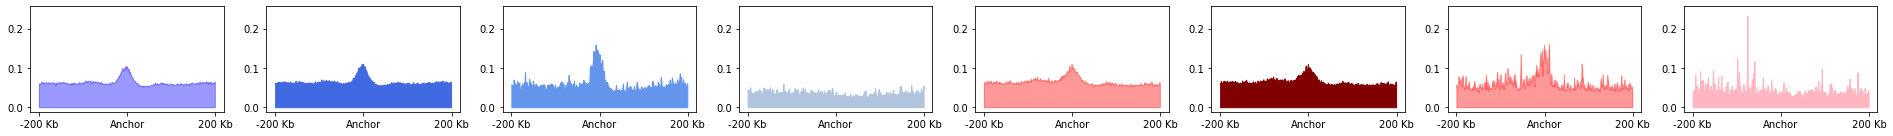

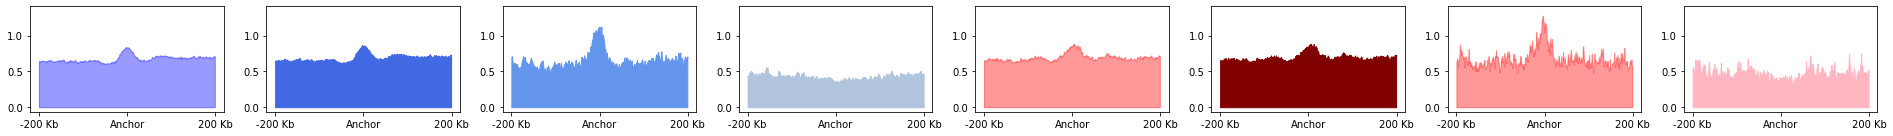

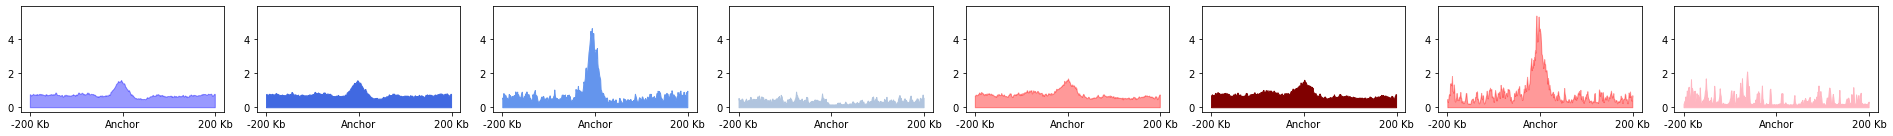

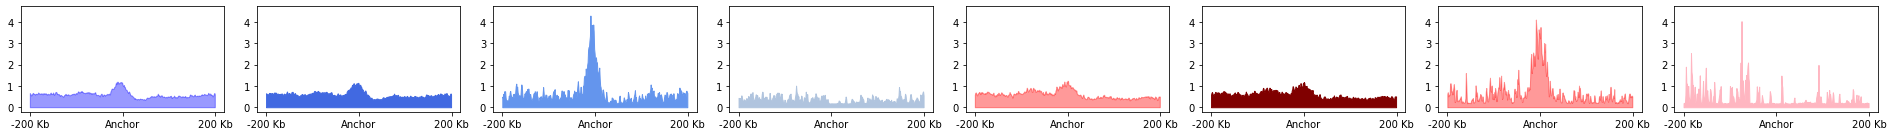

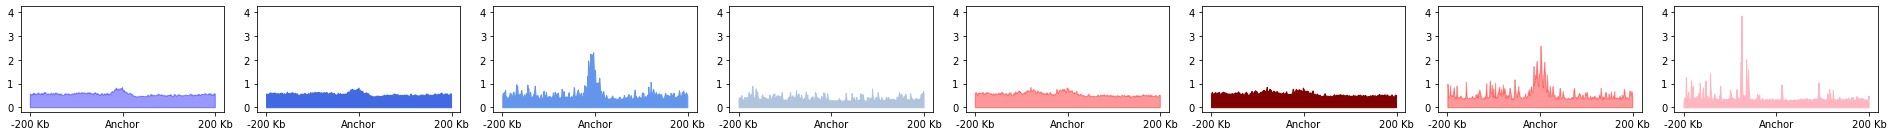

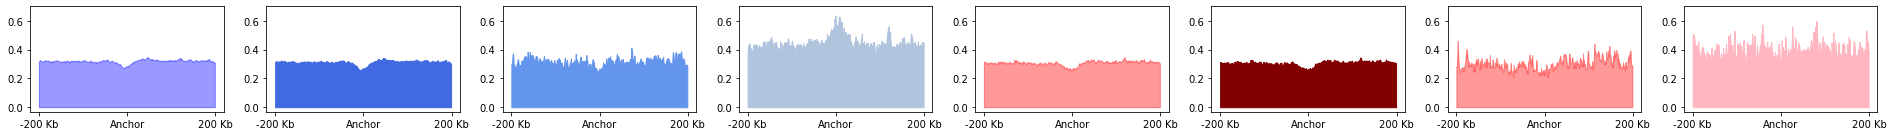

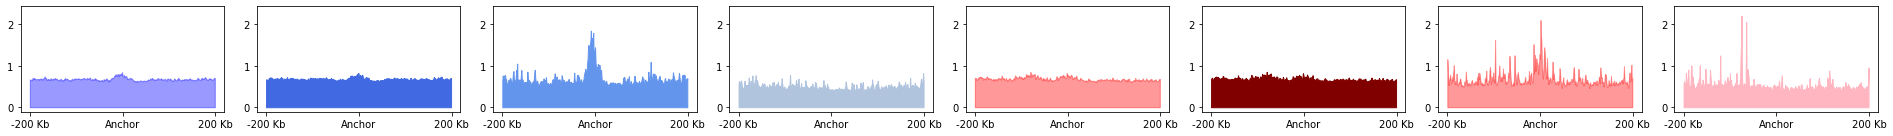

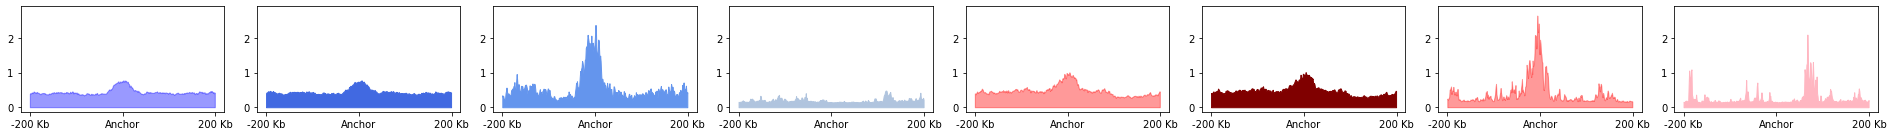

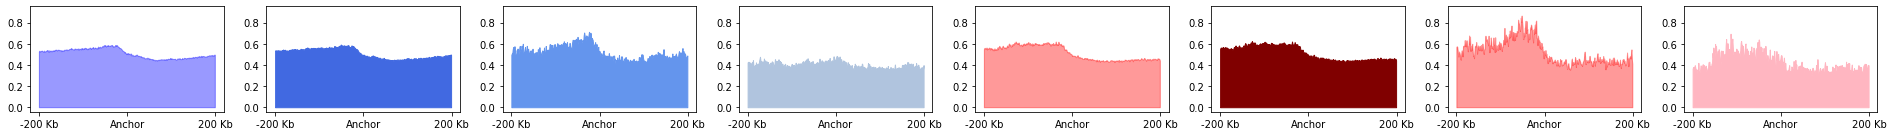

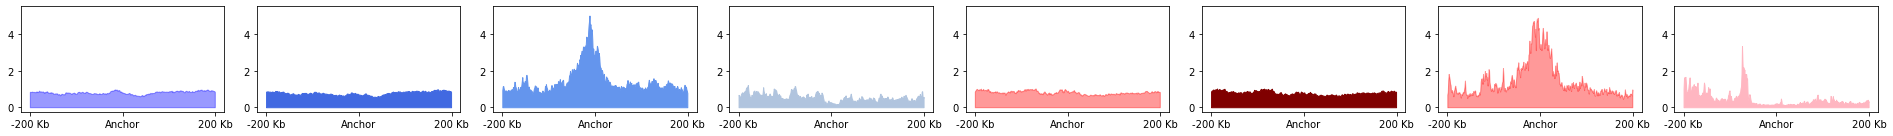

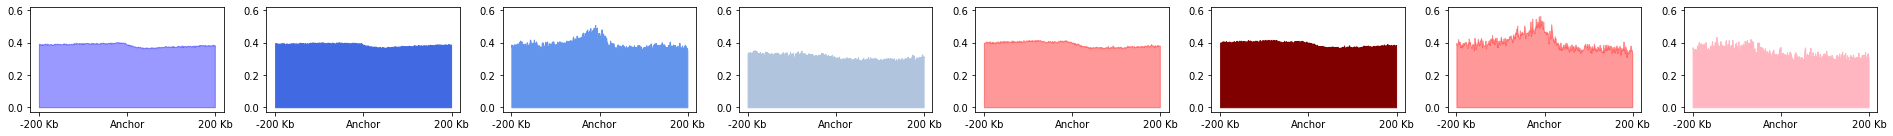

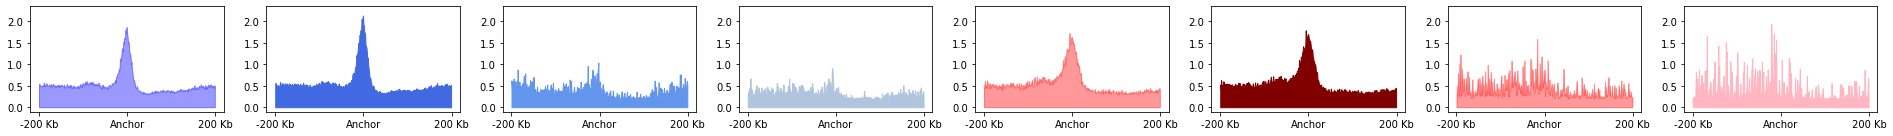

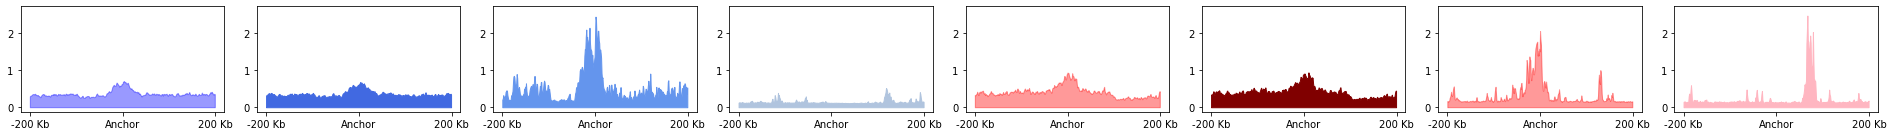

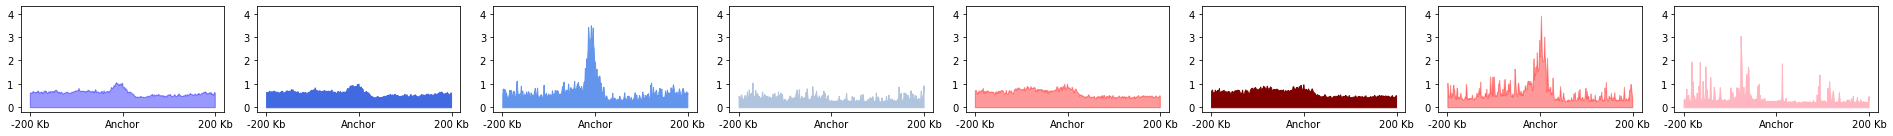

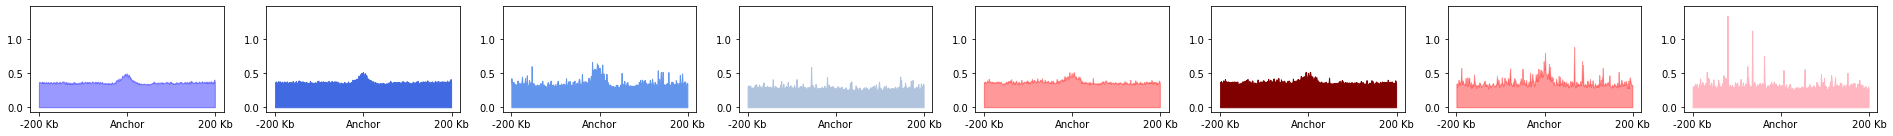

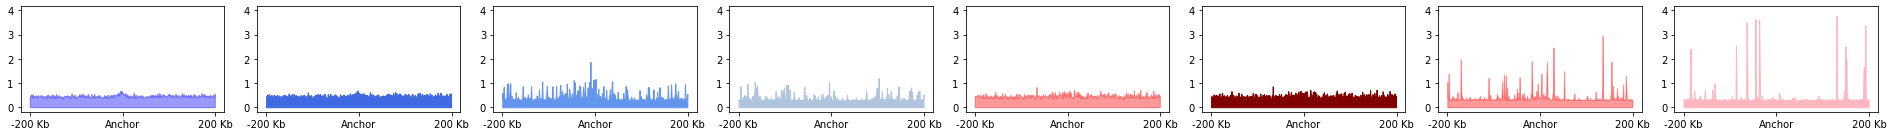

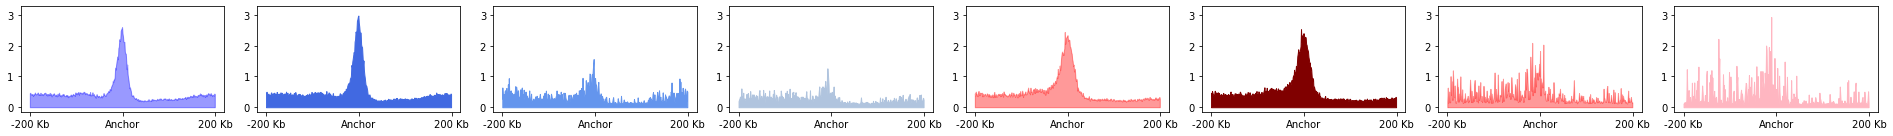

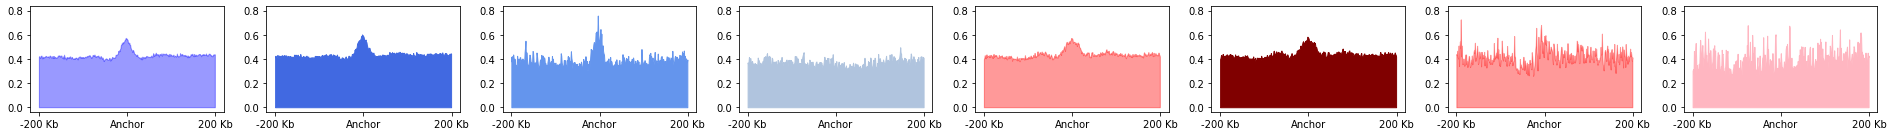

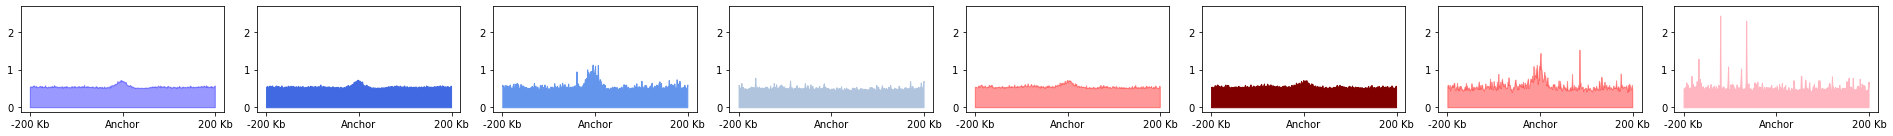

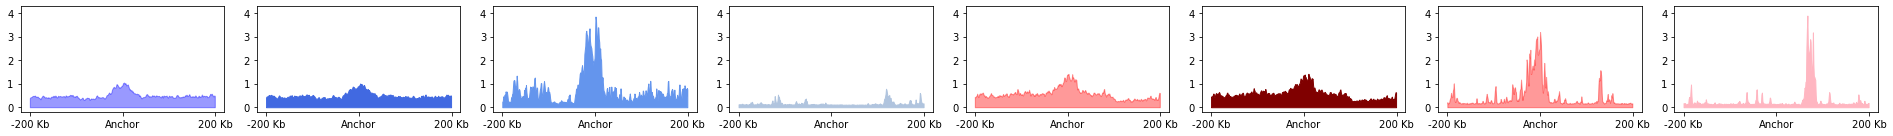

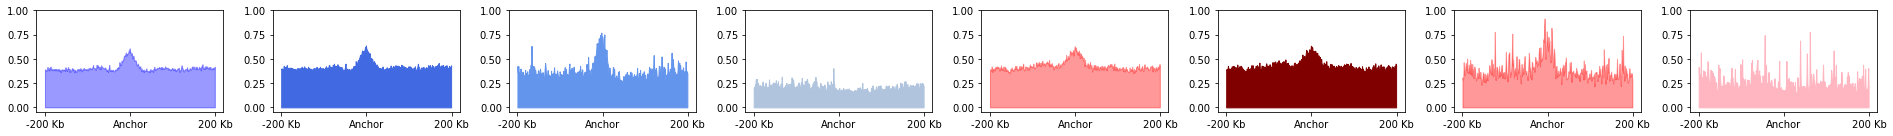

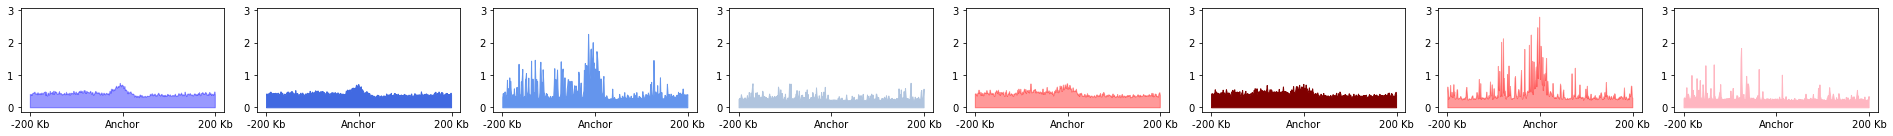

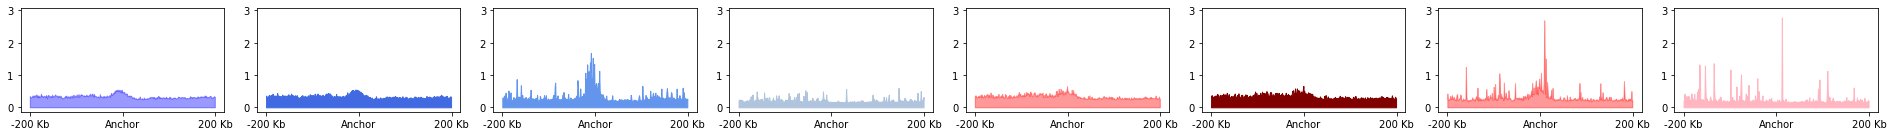

In [62]:
colors=['blue','royalblue', 'cornflowerblue', 'lightsteelblue','red','maroon','red','lightpink']

samples = {
    'Hi-C Quagga All': "/home/spmoran/temp_smoran/Fan_StripeCaller/060324_new_final_h1_hic/5000nt_MR15000000_ML20000_MD5000000_MW50000_WS10_SG1RH0.1_NSTR0_ALL_CHR.hg38H1.filtered.txt",
    'Hi-C Quagga CTCF': './H1_processed/H1-hESC_HiC_CTCFonly.txt',
    'Hi-C Quagga EP': './H1_processed/H1-hESC_HiC_EP_Permissive.txt',
    'Hi-C Quagga Unassigned': './H1_processed/H1-hESC_HiC_Unassigned_Permissive.txt',
    'Micro-C Quagga All': "/home/spmoran/temp_smoran/Fan_StripeCaller/060324_rapid_new_Micro-C/5000nt_MR5000000_ML20000_MD500000_WS20_MW_50000_SG6RH0.1_NSTR10_alt_ALL_H1_microC_hg38_filtered.txt",
    'Micro-C Quagga CTCF': "new_H1_micro-C_processed/H1-hESC_MiC_CTCFonly.txt",
    'Micro-C Quagga EP': "new_H1_micro-C_processed/H1-hESC_MiC_EP_Permissive.txt",
    'Micro-C Quagga Unassigned': "new_H1_micro-C_processed/H1-hESC_MiC_Unassigned_Permissive.txt", 
}

epi_names = [
    'DNase-seq', 'H3K4me1', 'H3K4me2', 'H3K4me3',
    'H3K9ac', 'H3K9me3', 'H3K27ac', 'H3K27me3', 'H3K36me3',
    'H3K79me2', 'H4K20me1', 'CTCF',
    'EZH2', 'POLR2A', 'JUND', 'REST',
    'RAD21', 'H2AFZ', 'EP300','SUZ12',
    'KDM1A', 'TBP', 'CREB1'
]

epi_analysis(samples, epi_names, "060824_H1_MiCvHiC_ctcf_v_ep_v_unassigned_window200KB_500nt", resolution=500, region_size=200000, colors=colors)

In [66]:
!ls /nfs/turbo/umms-drjieliu/usr/temp_smoran/Fan_StripeCaller/053124_streamlined_stripefiltering/060824_H1_MiCvHiC_ctcf_v_ep_v_unassigned_window200KB_500nt

CREB1.png      EZH2.png      H3K36me3.png  H3K79me2.png  JUND.png    REST.png
CTCF.png       H2AFZ.png     H3K4me1.png   H3K9ac.png	 KDM1A.png   SUZ12.png
DNase-seq.png  H3K27ac.png   H3K4me2.png   H3K9me3.png	 POLR2A.png  TBP.png
EP300.png      H3K27me3.png  H3K4me3.png   H4K20me1.png  RAD21.png


In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt


def epi_analysis_GM12878(
        stripe_files, epi_names, outdir,
        resolution=10000, region_size=1500000,
        chroms=None,
        colors=['blue', 'red', 'orange', 'green']# None: all chromosomes
):
    if chroms is None:
        chroms = [f'chr{elm}' for elm in list(range(1, 23)) + ['X']]
    length = region_size // resolution

    # Get stripe list
    stripes = {}
    counts = {}  # count the number of stripes, e.g., counts = {'Zebra': 100, 'Quagga': 200}
    for name in stripe_files:
        stripes[name] = {}
        counts[name] = 0
        f1 = open(stripe_files[name])
        for line in f1:
            # Skip the header line
            if line.startswith('#') or 'pos1' in line:
                continue
            lst = line.strip().split()
            ch, x1, x2, y1, y2 = lst[0], int(lst[1]), int(lst[2]), int(lst[4]), int(lst[5])
            # x1, x2, y1, y2 define a rectangle region
            # The longer edge of the rectangle region is the length of the stripe
            # The shorter edge of the rectangle region is the anchor of the stripe
            if x2 - x1 > y2 - y1:
                center = (y1 + y2) // 2 // resolution  # center of the anchor
                length_center = (x1 + x2) // 2 // resolution  # center of the "length of the stripe"
            else:
                length_center = (y1 + y2) // 2 // resolution
                center = (x1 + x2) // 2 // resolution
            # If the "center of the length" (i.e., the spanning direction) is upstream of the anchor,
            # then it's vertical
            if length_center < center:
                drc = 'v'
            else:
                drc = 'h'

            # fix chromosome names
            if not ch.startswith('chr'):
                ch = 'chr' + ch
            if ch not in stripes[name]:
                stripes[name][ch] = []
            stripes[name][ch].append((drc, center))
            counts[name] += 1

    # Initialize the empty vectors for storing epigenomic signals
    vecs = {name: {epi: np.zeros((length,)) for epi in epi_names} for name in stripe_files}
    # vecs = {'Quagga': {'CTCF': np.zeros((1000,)), 'RAD21': np.zeros((1000,))}, 'Zebra': {xxxxx} }

    for ch in chroms:
        print(ch)
        for epi in epi_names:
            print(' ', epi)
            # This is the path for GM12878 epigenomic signals
            # H1 data are in the same format under xxx/Epi/H1/{ch}/
            # These data are all from ENCODE, data source is
            # /nfs/turbo/umms-drjieliu/usr/temp_Fan/transfer/CAESAR/35_prepare_human_data/BatchDownloadEpi/data_sources.txt
#             epi_vec = np.load(f'/scratch/drjieliu_root/drjieliu/fanfeng/CAESAR_temp/training_data/Epi/H1/{ch}/{ch}_500bp_{epi}.npy')  # 500 bp resolution
            # epi_vec = np.load(f'/scratch/drjieliu_root/drjieliu/fanfeng/CAESAR_temp/training_data/Epi/GM12878/{ch}/{ch}_500bp_{epi}.npy')  # 500 bp resolution
            epi_vec = np.load(f'/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/notebooks/figures/epigenomic/GM12878/{ch}/{ch}_500bp_{epi}.npy')
            # The resolution of the .npy files are 500 bp, we have to downsample to 10 Kb
            fc = resolution // 500
            epi_vec2 = np.zeros((len(epi_vec) // fc,))
            for i in range(len(epi_vec) // fc):
                epi_vec2[i] = np.sum(epi_vec[i * fc: (i + 1) * fc])

            for name in stripe_files:  # Quagga, Zebra, StripeNN
                if ch not in stripes[name]:
                    continue
                for (drc, pos) in stripes[name][ch]:
                    # Get the vector centered at the anchor point
                    # If the center point is too close to the start/end of the chromosome,
                    # we have to pad zeros
                    if pos < length // 2:
                        actual_length = pos + length // 2
                        vec = np.concatenate([np.zeros((length - actual_length),), epi_vec2[:actual_length]])
                    elif pos + length // 2 > len(epi_vec2):
                        actual_length = len(epi_vec2) - pos + length // 2
                        vec = np.concatenate([epi_vec2[pos - length // 2:], np.zeros((length - actual_length,))])
                    else:
                        vec = epi_vec2[pos - length // 2: pos + length // 2]
                    # If the stripe is vertical, reverse the epigenomic vector
                    # So all stripes in the APA analysis are "horizontal stripes"
                    if drc == 'v':
                        vec = vec[::-1]
                    vecs[name][epi] += vec

    if not os.path.exists(outdir):
        os.mkdir(outdir)

    colors = colors
        
    for epi in epi_names:
        plt.figure(figsize=(3.3*len(colors), 2),tight_layout=True)
        max_val = 0
        for name in stripe_files:
            vec = vecs[name][epi] / counts[name]
            max_val = max(max_val, max(vec))

        for i, name in enumerate(stripe_files.keys()):
            vec = vecs[name][epi] / counts[name]
            
            aset=1.0
            if colors[i] == "blue" or colors[i] == "red" or colors[i]=="orange":
                aset=0.4
            
            plt.subplot(1, len(colors), i + 1)
            plt.fill_between(np.arange(len(vec)), 0, vec, color=colors[i], alpha=aset)#color='#DB3124', alpha=0.8)
            # plt.ylabel('H - Forward')
            plt.ylim([-max_val * 0.05, max_val * 1.1])
            # plt.xticks([0.5, region_radius + 0.5, 2 * region_radius + 0.5],
            #            [f'-{region_size // 1000} Kb', 'Anchor', f'{region_size // 1000} Kb'])
            plt.xticks([0, length // 2, length], [f'-{region_size // 1000} Kb', 'Anchor', f'{region_size // 1000} Kb'])
            # plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], [])

        plt.savefig(f'{outdir}/{epi}.png')
        plt.show()
   
                    

chr1
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr2
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr3
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr4
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST
  RAD21
  H2AFZ
  EP300
  SUZ12
  KDM1A
  TBP
  CREB1
chr5
  DNase-seq
  H3K4me1
  H3K4me2
  H3K4me3
  H3K9ac
  H3K9me3
  H3K27ac
  H3K27me3
  H3K36me3
  H3K79me2
  H4K20me1
  CTCF
  EZH2
  POLR2A
  JUND
  REST

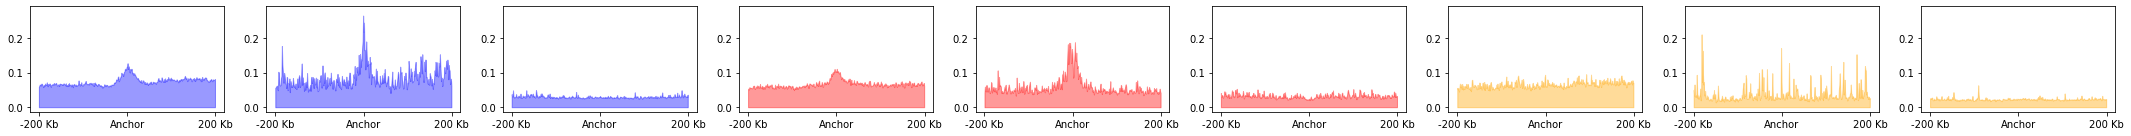

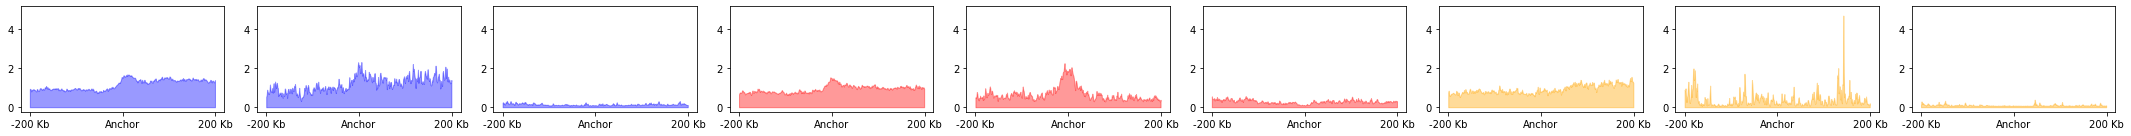

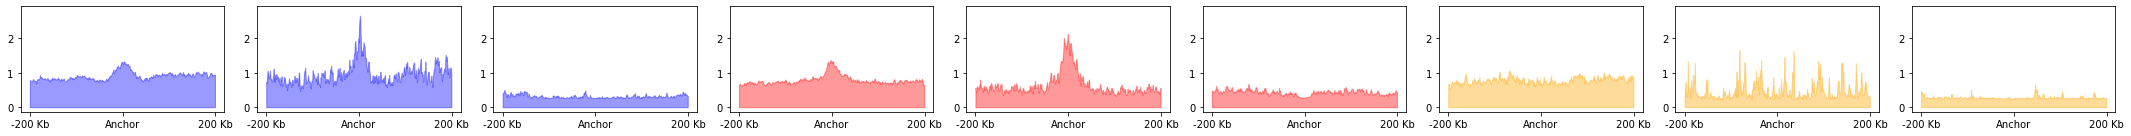

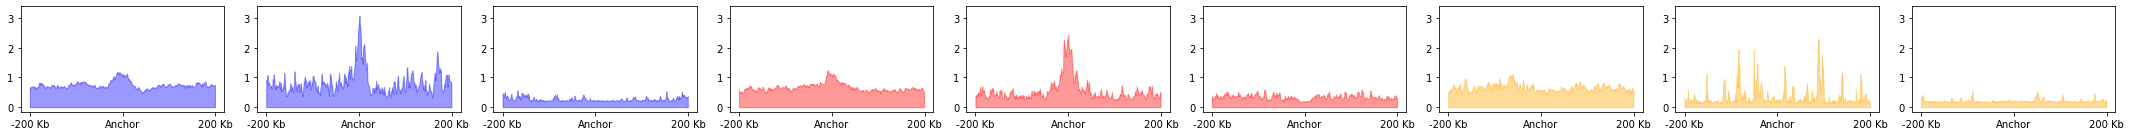

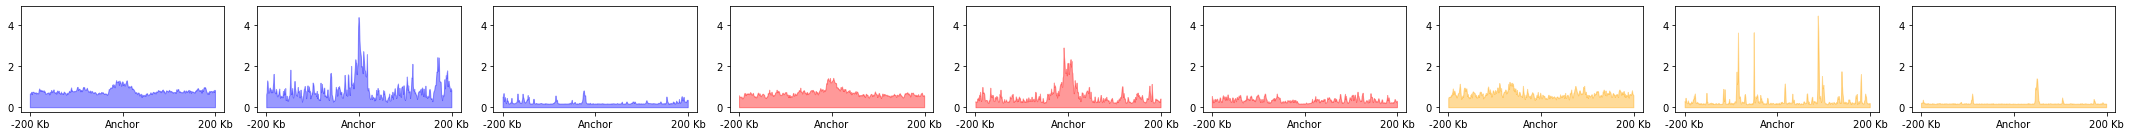

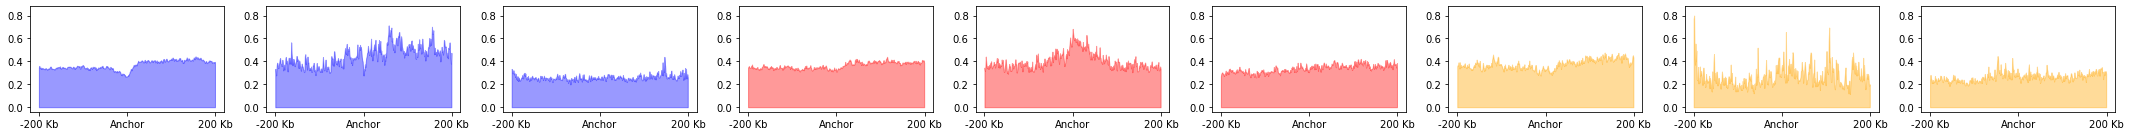

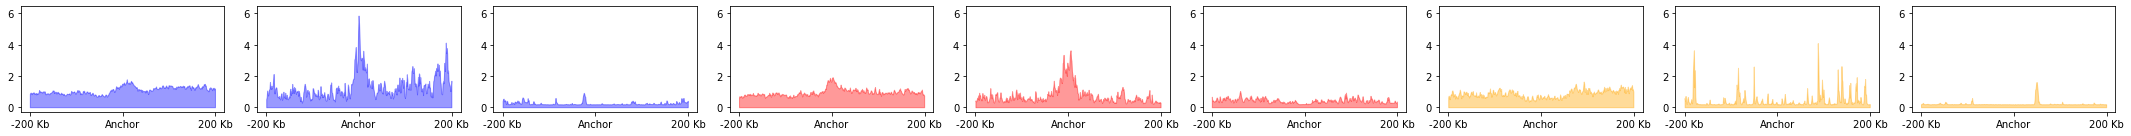

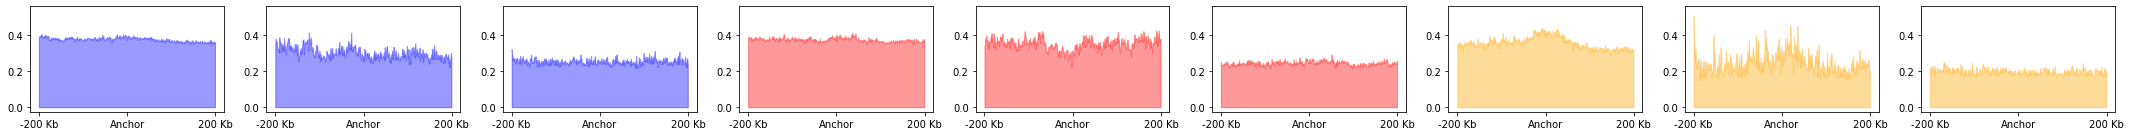

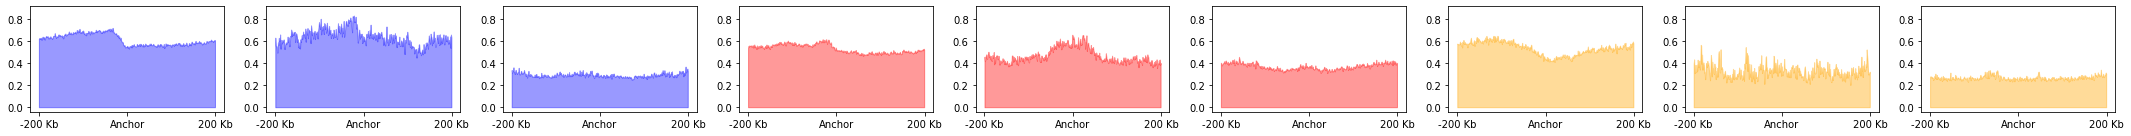

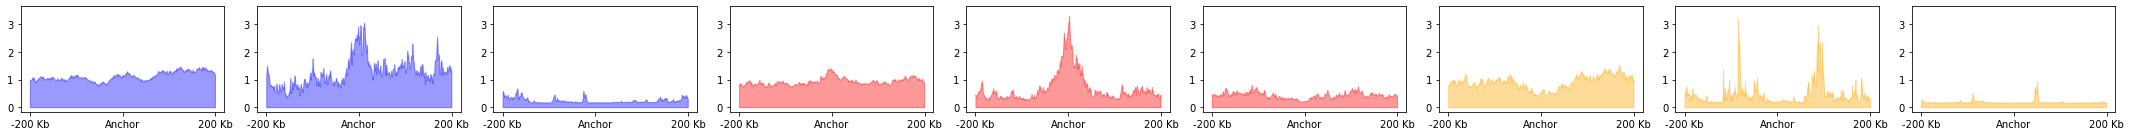

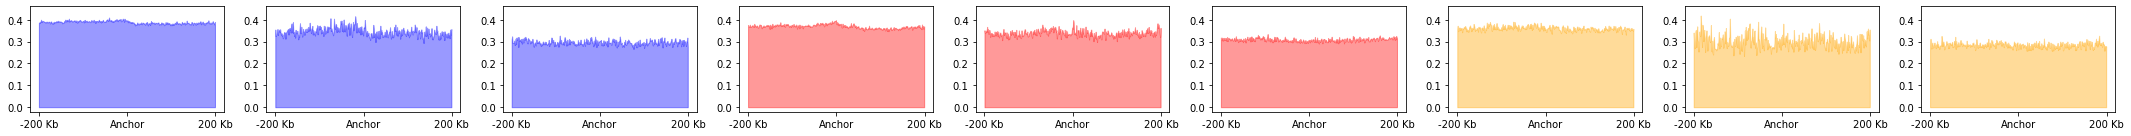

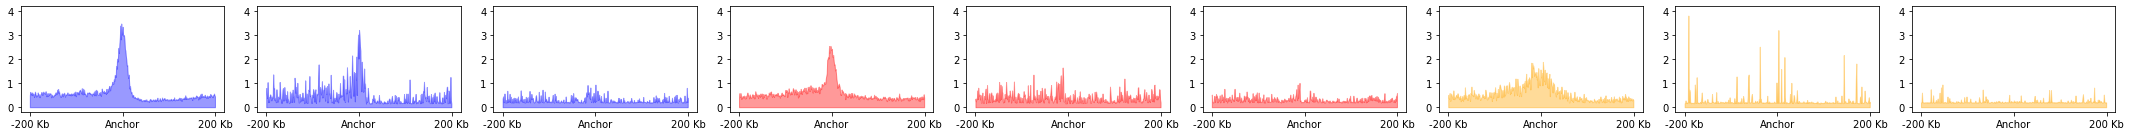

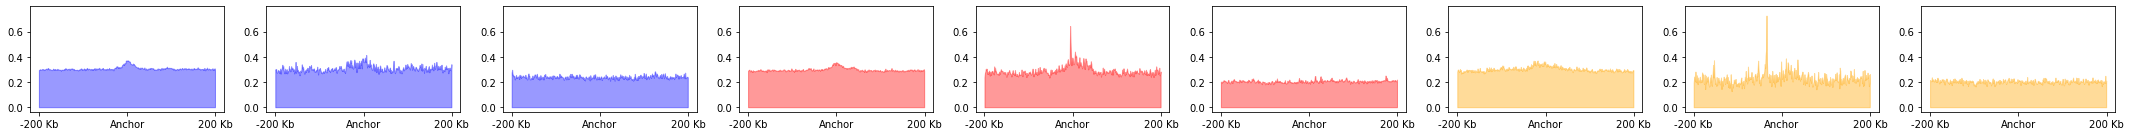

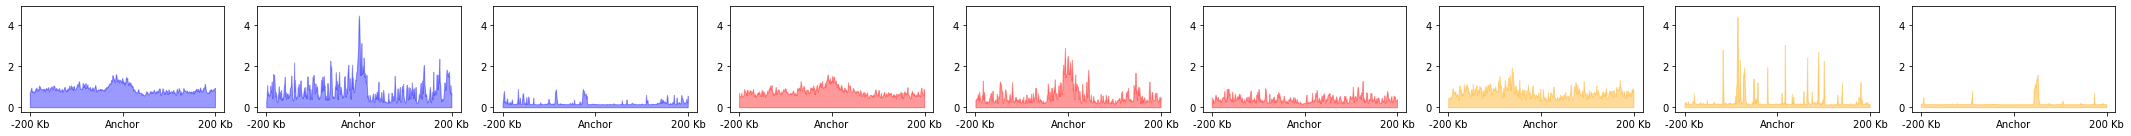

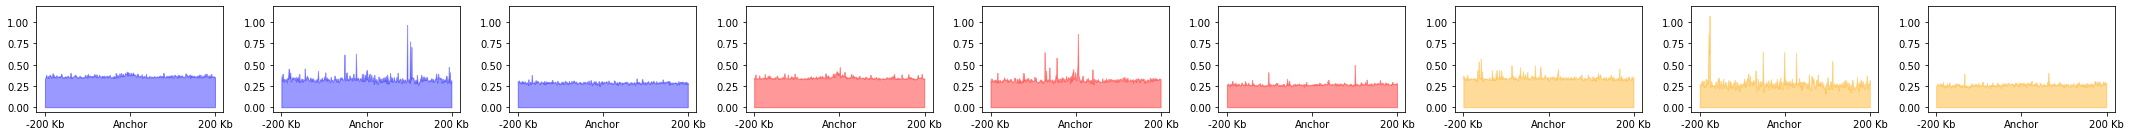

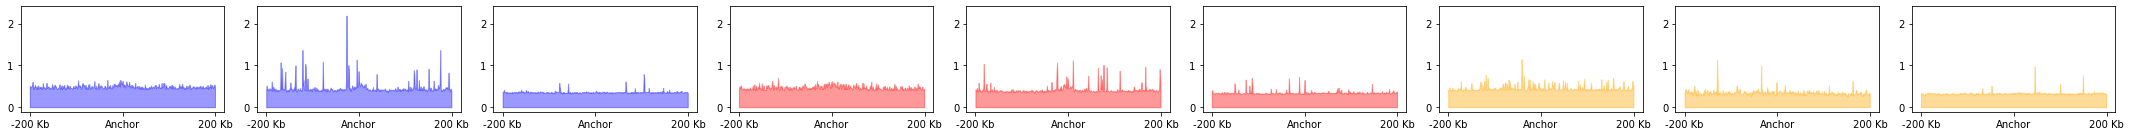

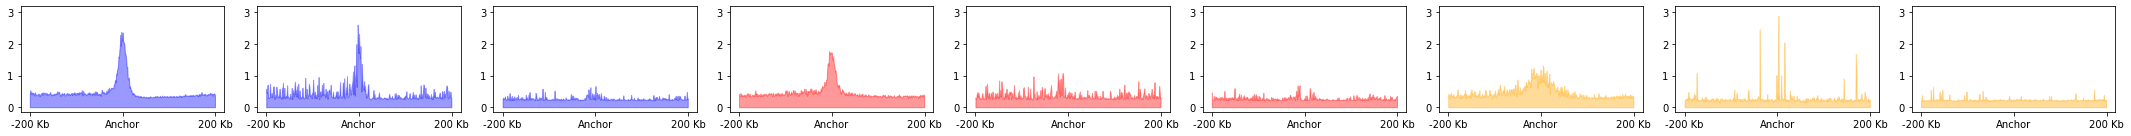

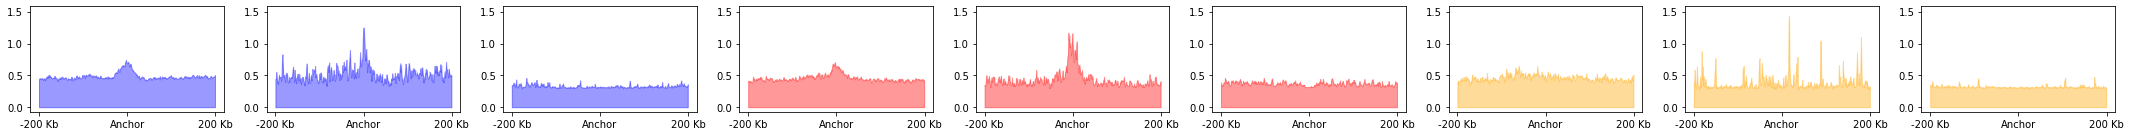

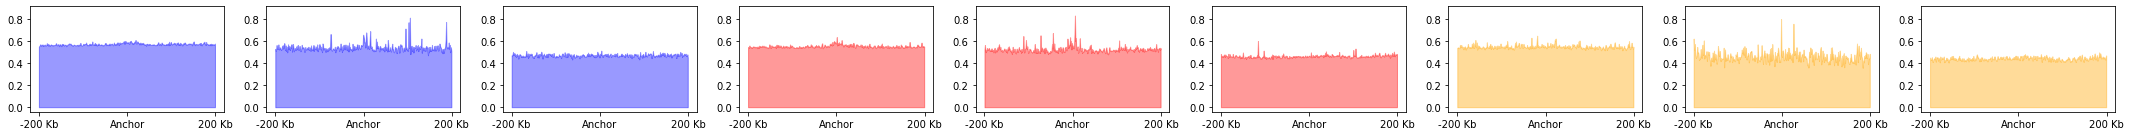

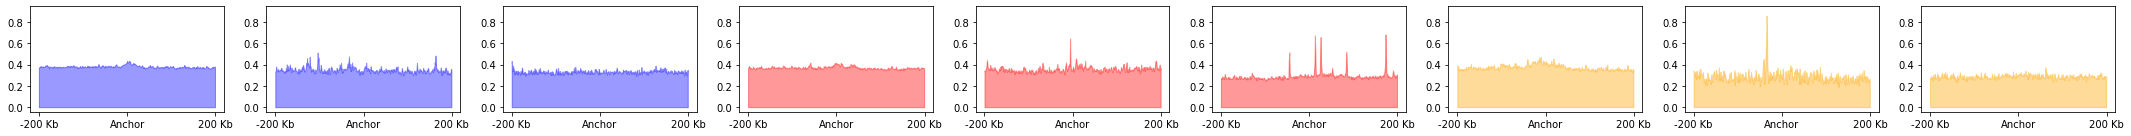

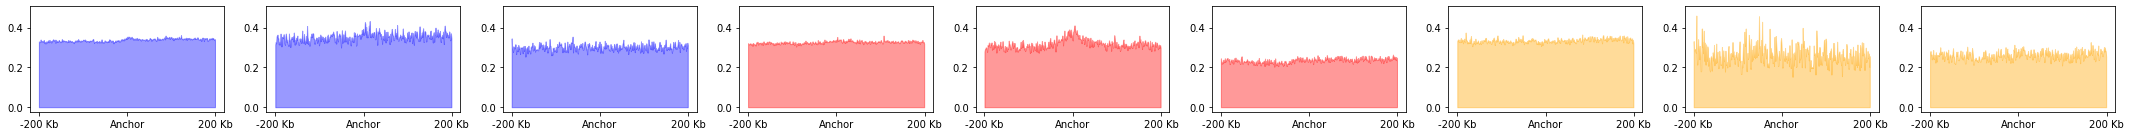

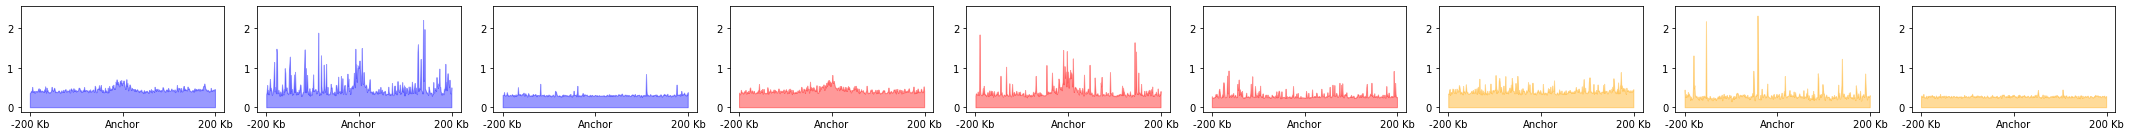

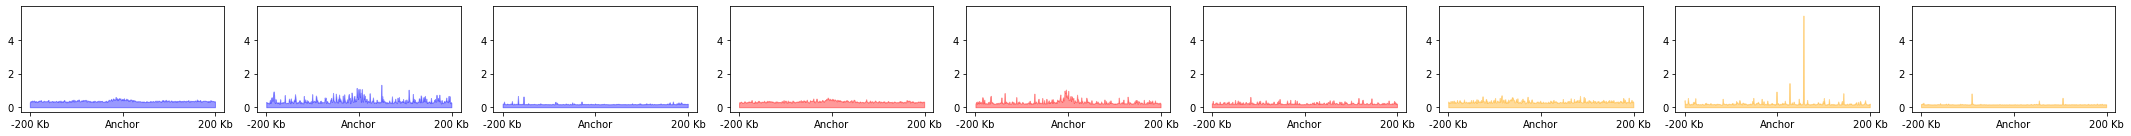

In [84]:
colors=['blue']*3+['red']*3+['orange']*3 #,'royalblue', 'cornflowerblue', 'lightsteelblue','red','maroon','red','lightpink']

# samples = {
#     'Quagga CTCF': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_CTCFonly.txt',
#     'Quagga EP': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP.txt',
#     'Quagga Unassigned': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned.txt',
#     'Zebra CTCF': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_CTCFonly.txt',
#     'Zebra EP': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_EP.txt',
#     'Zebra Unassigned': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned.txt',
#     'StripeNN CTCF': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_CTCFonly.txt',
#     'StripeNN EP': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP.txt',
#     'StripeNN Unassigned': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned.txt',
# }

samples = {
    'Quagga CTCF': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_CTCFonly.txt',
    'Quagga EP': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt',
    'Quagga Unassigned': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt',
    'Zebra CTCF': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_CTCFonly.txt',
    'Zebra EP': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt',
    'Zebra Unassigned': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt',
    'StripeNN CTCF': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_CTCFonly.txt',
    'StripeNN EP': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt',
    'StripeNN Unassigned': '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt',
}


epi_names = [
    'DNase-seq', 'H3K4me1', 'H3K4me2', 'H3K4me3',
    'H3K9ac', 'H3K9me3', 'H3K27ac', 'H3K27me3', 'H3K36me3',
    'H3K79me2', 'H4K20me1', 'CTCF',
    'EZH2', 'POLR2A', 'JUND', 'REST',
    'RAD21', 'H2AFZ', 'EP300','SUZ12',
    'KDM1A', 'TBP', 'CREB1'
]

epi_analysis_GM12878(samples, epi_names, "060824_alltools_gm12878_ctcf_v_ep_v_unassigned_gm12878_window200KB_500nt", resolution=500, region_size=200000, colors=colors)

In [81]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_CTCFonly.txt

3988 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_CTCFonly.txt


In [83]:
!wc -l '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt'

177 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_EP_Permissive.txt


In [82]:
!wc -l '/home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt'

220 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Quagga_GM12878_Unassigned_Permissive.txt


In [80]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_CTCFonly.txt

2524 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_Merged_GM12878_CTCFonly.txt


In [79]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt

243 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_EP_Permissive.txt


In [78]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt

514 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/Zebra_AB_GM12878_Unassigned_Permissive.txt


In [77]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_CTCFonly.txt

739 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_CTCFonly.txt


In [75]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt

23 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_EP_Permissive.txt


In [76]:
!wc -l /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt

114 /home/spmoran/temp_smoran/Fan_StripeCaller/2024_SummerPublishPush/ctcf_deficient/Othermodels/StripeNN_GM12878_Unassigned_Permissive.txt
